# Example Notebook for ERA5 data
Author(s): [Bjorn Backeberg](mailto:backeb@gmail.com) (backeb) <br> 
Creation date: 16-Jul-2019 <br>
Last updated:  17-Jul-2019 <br>

---

## Purpose
1. Load monthly rainfall and temperature ERA5 netcdf data for user defined location, data can be downloaded [here](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview)
2. Calculate annual anomaly
3. Plot as warming stripes (https://en.wikipedia.org/wiki/Warming_stripes)


### Import necessary libraries

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### User input
In the below cell, define the longitude (positive, decimal degrees East) and latitude (positive, decimal degrees North) for the location you wish to plot the warming stripes.

In [4]:
lon_in = 18.452758
lat_in = -33.928570

### Load dataset as a pandas dataframe

In [11]:
# open dataset for nearest user defined location
ds = xr.open_dataset('data/ERA5_rainfall_and_temperature.nc').sel(longitude = lon_in, 
                                                                  latitude = lat_in,
                                                                  method = 'nearest')
# convert to pandas dataframe
df = ds.to_dataframe()

df = df.drop(df[df.index.year >= 2019].index)

# display the last 10 rows of the dataframe
df[-10:]

,longitude,latitude,t2m,tp
time,,,,
2018-03-01,18.5,-34.0,291.509460,0.000537
2018-04-01,18.5,-34.0,290.081268,0.002141
2018-05-01,18.5,-34.0,289.169708,0.003069
2018-06-01,18.5,-34.0,287.755615,0.003930
2018-07-01,18.5,-34.0,287.676270,0.002110
2018-08-01,18.5,-34.0,285.987122,0.002221
2018-09-01,18.5,-34.0,286.960419,0.002563
2018-10-01,18.5,-34.0,290.492096,0.000434
2018-11-01,18.5,-34.0,290.425110,0.000523


### Exercise 1: Calculate annual anomaly
There is a problem with the anomaly calculation below. Fix it. <br>
<br>
Hints:
1. Have a look at the monthly data for 2019
2. Check out [this](https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving) possible solution

In [12]:
# calculate the monthly mean values
anomaly = df.groupby([df.index.year]).mean()

# subtract the long term mean from the monthly mean values for temperature and rainfall
anomaly['t2m'] = anomaly['t2m'] - df['t2m'].mean()

# display the first 10 rows of the result
anomaly[-10:]

,longitude,latitude,t2m,tp
time,,,,
2009,18.5,-34.0,0.252167,0.001886
2010,18.5,-34.0,0.037506,0.001457
2011,18.5,-34.0,0.011475,0.001411
2012,18.5,-34.0,0.117126,0.001833
2013,18.5,-34.0,0.113617,0.002402
2014,18.5,-34.0,0.441406,0.001781
2015,18.5,-34.0,0.270538,0.001324
2016,18.5,-34.0,0.481659,0.001436
2017,18.5,-34.0,0.222046,0.001220


### Create temperature stack to plot as stripes

In [13]:
temperature = anomaly['t2m'].values
stack = np.stack((temperature, temperature))

# print shapes to see what you've done
print(temperature.shape)
print(stack.shape)

(40,)
(2, 40)


### Plot the warming stripes

Text(0.5, 1.0, 'Warming stripes for ERA5 temperature data')

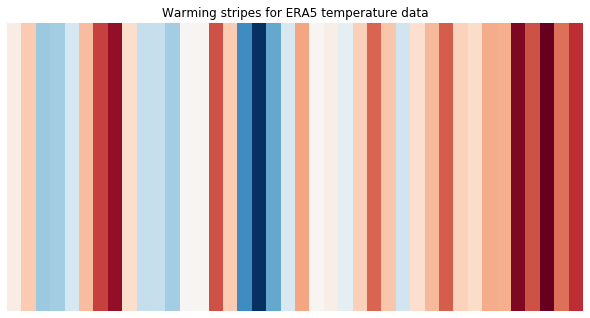

In [14]:
vmin = temperature.min()
vmax = temperature.max()
## plotting
###############
plt.figure(figsize=(8,40))
# img = plt.imshow(stack, cmap='RdBu_r', aspect=20, vmin=vmin, vmax=vmax)
img = plt.imshow(stack, cmap='RdBu_r', aspect=10, )

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.title('Warming stripes for ERA5 temperature data')

#plt.savefig("stripes.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

### Exercise 2: Calculate the anomaly and plot the warming stripes for rainfall (variable name = tp) 

## Answers to Exercises

### Exercise 1
Add the below line of code before calculating the anomaly to remove the 4 months of data in 2019

In [ ]:
df = df.drop(df[df.index.year >= 2019].index)

### Exercise 2

Text(0.5, 1.0, 'Warming stripes for ERA5 rainfall data')

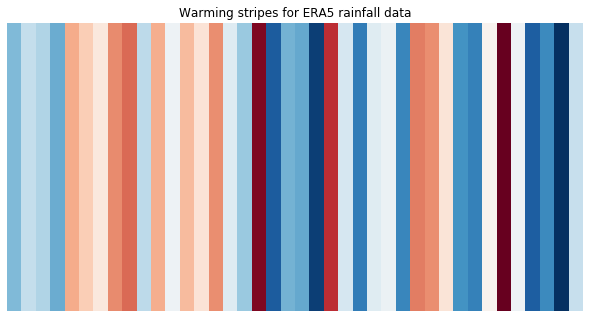

In [15]:
anomaly['tp'] = anomaly['tp'] - df['tp'].mean()
rainfall = anomaly['tp'].values

stack2 = np.stack((rainfall, rainfall))
vmin = rainfall.min()
vmax = rainfall.max()

plt.figure(figsize=(8,40))
# img = plt.imshow(stack2, cmap='RdBu_r', aspect=20, vmin=vmin, vmax=vmax)
img = plt.imshow(stack2, cmap='RdBu_r', aspect=10, )

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.title('Warming stripes for ERA5 rainfall data')

#plt.savefig("stripes.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)